# Data Insights and Presentation (Task 3)

### Using visualisations to present insights [Link To Tableau Visualization](https://public.tableau.com/profile/emetowinner#!/vizhome/KPMGInternshipTask3/SUMMARY?publish=yes)

**Importing all the needed modules for analysis and visualization**

In [330]:
import pandas as pd
import numpy as np
from datetime import datetime as DT
import io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [331]:
# Using the pandas Excel class to raed the excel file load the excel file
data_set = pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')

sheet = 0  # Sheet counter
name = ''

# ## Seperating the sheets and saving them as CSV file. Note:uncomment this if individual files are not on your local drive
# for sheet_name in data_set.sheet_names:
#     if sheet <= len(data_set.sheet_names):
#         print(f'Reading {data_set.sheet_names[sheet]} to a DataFrame....')
#         df = pd.read_excel(data_set, sheet_name)
#         if sheet == 1:
#             name = 'Transactions.csv'
#             df.to_csv(name)
#         elif sheet == 2:
#             name = 'NewCustomerList.csv'
#             df.to_csv(name)
#         elif sheet == 3:
#             name = 'CustomerDemographic.csv'
#             df.to_csv(name)
#         elif sheet == 4:
#             name = 'CustomerAddress.csv'
#             df.to_csv(name)
#         else:
#             pass
#         print()
#         print(
#             f'Saved {data_set.sheet_names[sheet]} as a CSV file with the name {name}')
#         sheet += 1


In [332]:
## Reading the data set
Transactions = pd.read_csv("Transactions.csv")
CustomerDemographic = pd.read_csv("CustomerDemographic.csv")
CustomerAddress = pd.read_csv("CustomerAddress.csv")

In [333]:
Transactions

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2/25/2017,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,5/21/2017,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,10/16/2017,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,8/31/2017,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,10/1/2017,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,6/24/2017,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,11/9/2017,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,4/14/2017,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,7/3/2017,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


In [334]:
CustomerDemographic

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,10/12/1953,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,12/16/1980,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1/20/1954,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,10/3/1961,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,5/13/1977,Senior Editor,NaN,Affluent Customer,N,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,8/9/1975,VP Product Management,Health,Mass Customer,N,No,19.0
3996,3997,Blanch,Nisuis,Female,87,7/13/2001,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaN,Assistant Manager,IT,High Net Worth,N,No,NaN
3998,3999,Patrizius,NaN,Male,11,10/24/1973,NaN,Manufacturing,Affluent Customer,N,Yes,10.0


In [335]:
CustomerAddress

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


## Data Quality

In [336]:
print('null values for customers ?',CustomerDemographic.isnull().values.any())

null values for customers ? True


In [337]:
CustomerDemographic.columns[CustomerDemographic.isna().any()].tolist()

['last_name', 'DOB', 'job_title', 'job_industry_category', 'tenure']

In [338]:
CustomerDemographic = CustomerDemographic.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [339]:
print('null values for customers ?',CustomerDemographic.isnull().values.any())

null values for customers ? False


In [340]:
CustomerDemographic

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,10/12/1953,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,12/16/1980,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1/20/1954,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
8,9,Mala,Lind,Female,97,3/10/1973,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0
9,10,Fiorenze,Birdall,Female,49,10/11/1988,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3992,3993,Andi,Dumelow,Female,6,12/5/1974,Librarian,Entertainment,Mass Customer,N,No,10.0
3993,3994,Stephie,Byars,Female,5,4/7/1989,Structural Analysis Engineer,Manufacturing,Affluent Customer,N,No,12.0
3994,3995,Rusty,Iapico,Male,93,12/12/1975,Staff Scientist,Manufacturing,Mass Customer,N,Yes,14.0
3995,3996,Rosalia,Halgarth,Female,8,8/9/1975,VP Product Management,Health,Mass Customer,N,No,19.0


In [341]:
print('null values for customers ?',Transactions.isnull().values.any())  

null values for customers ? True


In [342]:
Transactions.columns[Transactions.isna().any()].tolist()

['online_order',
 'brand',
 'product_line',
 'product_class',
 'product_size',
 'standard_cost',
 'product_first_sold_date']

In [343]:
Transactions = Transactions.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [344]:
print('null values for customers ?',Transactions.isnull().values.any()) 

null values for customers ? False


## Univariate Analysis (single variable analysis)

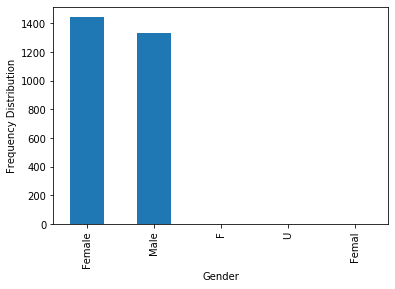

In [345]:
CustomerDemographic['gender'].value_counts().plot(kind='bar')
plt.xlabel("Gender")
plt.ylabel("Frequency Distribution")
plt.show()

C:\Users\Winner\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


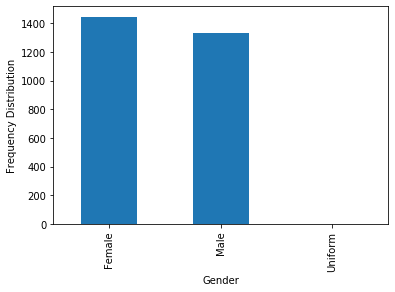

In [346]:

CustomerDemographic["gender"].replace("F","Female",inplace=True)
CustomerDemographic["gender"].replace("Femal","Female",inplace=True)
CustomerDemographic["gender"].replace("U","Uniform",inplace=True)
CustomerDemographic["gender"].replace("M","Male",inplace=True)

CustomerDemographic['gender'].value_counts().plot(kind='bar')
plt.xlabel("Gender")
plt.ylabel("Frequency Distribution")
plt.show()

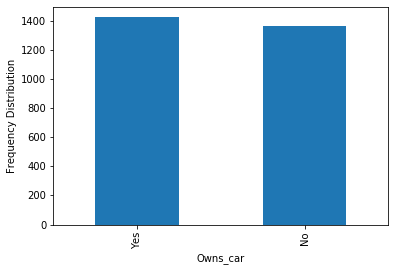

In [347]:
CustomerDemographic['owns_car'].value_counts().plot(kind='bar')
plt.xlabel("Owns_car")
plt.ylabel("Frequency Distribution")
plt.show()

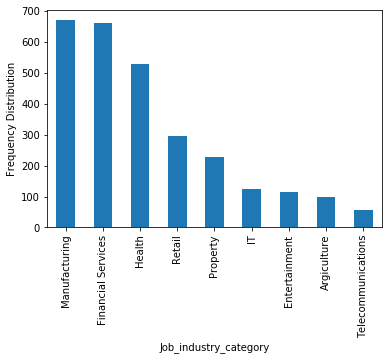

In [348]:
CustomerDemographic['job_industry_category'].value_counts().plot(kind='bar')
plt.xlabel("Job_industry_category")
plt.ylabel("Frequency Distribution")
plt.show()

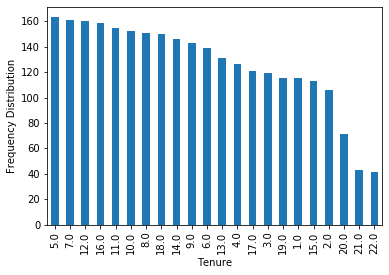

In [349]:
CustomerDemographic['tenure'].value_counts().plot(kind='bar')
plt.xlabel("Tenure")
plt.ylabel("Frequency Distribution")
plt.show()

In [350]:
CustomerDemographic["DOB"].replace("1843-12-21","12/21/1843",inplace=True)
## Change the date type of DOB column
CustomerDemographic.loc[:, ('DOB')] = pd.to_datetime(CustomerDemographic.loc[:, ('DOB')],format="%m/%d/%Y")

now = pd.Timestamp('now')
CustomerDemographic['DOB'] = CustomerDemographic['DOB'].where(CustomerDemographic['DOB'] < now, CustomerDemographic['DOB'] -  np.timedelta64(100, 'Y'))
CustomerDemographic['Age'] = (now - CustomerDemographic['DOB']).astype('<m8[Y]')
CustomerDemographic.head(3)

C:\Users\Winner\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Winner\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Winner\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,39.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,66.0


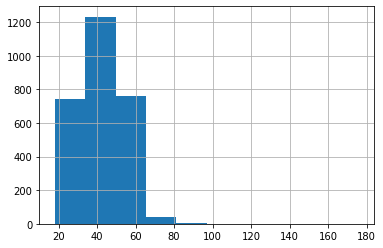

In [351]:
CustomerDemographic['Age'].hist(bins=10)  
plt.show()

In [352]:
print("TC: ",CustomerDemographic["Age"].count(),"==========","TC Without Age: ",CustomerDemographic["Age"].isna().sum())

TC:  2780 ========== TC Without Age:  0


## Bivariate Analysis (2-variable analysis)

In [353]:
merged_dataset = pd.merge(Transactions, CustomerDemographic, on='customer_id', how='left')

In [354]:
merged_dataset.sort_values('past_3_years_bike_related_purchases',ascending=False)


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
7459,7651,20,2402,8/1/2017,1.0,Approved,Trek Bicycles,Standard,medium,small,...,Female,99.0,1957-06-07,Cost Accountant,Financial Services,Mass Customer,N,Yes,8.0,63.0
15733,16189,92,1132,11/16/2017,0.0,Approved,WeareA2B,Standard,medium,small,...,Female,99.0,1985-08-01,Actuary,Financial Services,Affluent Customer,N,Yes,9.0,34.0
14176,14574,59,1452,6/10/2017,0.0,Approved,Solex,Standard,medium,large,...,Male,99.0,1955-12-31,Safety Technician III,Retail,Mass Customer,N,No,20.0,64.0
10137,10414,3,1282,3/18/2017,0.0,Approved,Trek Bicycles,Standard,medium,large,...,Male,99.0,1980-11-15,Programmer Analyst III,Entertainment,Affluent Customer,N,Yes,14.0,39.0
8466,8696,45,1098,1/15/2017,1.0,Approved,Solex,Standard,medium,medium,...,Female,99.0,1989-02-01,Administrative Assistant IV,Financial Services,Mass Customer,N,Yes,12.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19433,19989,0,714,4/27/2017,1.0,Approved,Norco Bicycles,Standard,low,medium,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19436,19992,11,1374,9/14/2017,0.0,Approved,Giant Bicycles,Standard,high,medium,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19437,19993,13,5,4/28/2017,0.0,Approved,Solex,Standard,medium,medium,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19438,19994,77,2618,12/23/2017,0.0,Approved,Norco Bicycles,Road,medium,large,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [355]:
merged_dataset = merged_dataset.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [356]:
print('null values for merged_dataset ?',merged_dataset.isnull().values.any())

null values for merged_dataset ? False


In [357]:
merged_dataset.sort_values('past_3_years_bike_related_purchases',ascending=False)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
7459,7651,20,2402,8/1/2017,1.0,Approved,Trek Bicycles,Standard,medium,small,...,Female,99.0,1957-06-07,Cost Accountant,Financial Services,Mass Customer,N,Yes,8.0,63.0
15733,16189,92,1132,11/16/2017,0.0,Approved,WeareA2B,Standard,medium,small,...,Female,99.0,1985-08-01,Actuary,Financial Services,Affluent Customer,N,Yes,9.0,34.0
14176,14574,59,1452,6/10/2017,0.0,Approved,Solex,Standard,medium,large,...,Male,99.0,1955-12-31,Safety Technician III,Retail,Mass Customer,N,No,20.0,64.0
10137,10414,3,1282,3/18/2017,0.0,Approved,Trek Bicycles,Standard,medium,large,...,Male,99.0,1980-11-15,Programmer Analyst III,Entertainment,Affluent Customer,N,Yes,14.0,39.0
8466,8696,45,1098,1/15/2017,1.0,Approved,Solex,Standard,medium,medium,...,Female,99.0,1989-02-01,Administrative Assistant IV,Financial Services,Mass Customer,N,Yes,12.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13962,14353,22,428,8/31/2017,0.0,Approved,Solex,Standard,medium,medium,...,Female,0.0,1977-05-03,Structural Engineer,Health,High Net Worth,N,Yes,14.0,43.0
3892,3975,0,2720,4/25/2017,0.0,Approved,Trek Bicycles,Standard,medium,medium,...,Female,0.0,1983-09-02,Account Coordinator,Retail,High Net Worth,N,No,10.0,36.0
15069,15500,27,3143,12/10/2017,0.0,Approved,Trek Bicycles,Standard,medium,medium,...,Female,0.0,1996-10-24,Chief Design Engineer,Manufacturing,Mass Customer,N,No,5.0,23.0
7943,8156,62,572,8/18/2017,0.0,Approved,Solex,Standard,high,medium,...,Male,0.0,1967-05-01,Clinical Specialist,Health,High Net Worth,N,Yes,5.0,53.0


In [358]:
merged_dataset.dtypes

transaction_id                                  int64
product_id                                      int64
customer_id                                     int64
transaction_date                               object
online_order                                  float64
order_status                                   object
brand                                          object
product_line                                   object
product_class                                  object
product_size                                   object
list_price                                    float64
standard_cost                                 float64
product_first_sold_date                       float64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases           float64
DOB                                    datetime64[ns]
job_title                   

In [359]:
merged_dataset.iloc[:1]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,2,2950,2/25/2017,0.0,Approved,Solex,Standard,medium,medium,...,Male,19.0,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,65.0


In [360]:
# merged_dataset.to_csv("Customer_Transactions.csv")

In [361]:
merged_dataset['Total_Price'] = merged_dataset['past_3_years_bike_related_purchases'] * merged_dataset['standard_cost']

In [362]:
merged_dataset.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,Total_Price
0,1,2,2950,2/25/2017,0.0,Approved,Solex,Standard,medium,medium,...,19.0,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,65.0,1018.78
1,2,3,3120,5/21/2017,1.0,Approved,Trek Bicycles,Standard,medium,large,...,89.0,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,41.0,34613.88
2,3,37,402,10/16/2017,0.0,Approved,OHM Cycles,Standard,low,medium,...,9.0,1977-06-03,Desktop Support Technician,Retail,Affluent Customer,N,No,22.0,43.0,2239.38
3,4,88,3135,8/31/2017,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,83.0,1962-01-14,Staff Scientist,Financial Services,Mass Customer,N,No,16.0,58.0,31631.30
5,6,25,2339,3/8/2017,1.0,Approved,Giant Bicycles,Road,medium,medium,...,3.0,1958-12-28,Web Designer II,Property,Affluent Customer,N,Yes,16.0,61.0,2488.95


In [363]:
total_merged_dataset = pd.merge(merged_dataset, CustomerAddress, on='customer_id', how='left')
total_merged_dataset = total_merged_dataset.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
print('null values for total_merged_dataset ?',total_merged_dataset.isnull().values.any())

null values for total_merged_dataset ? False


In [364]:
total_merged_dataset

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,deceased_indicator,owns_car,tenure,Age,Total_Price,address,postcode,state,country,property_valuation
0,1,2,2950,2/25/2017,0.0,Approved,Solex,Standard,medium,medium,...,N,Yes,10.0,65.0,1018.78,984 Hoepker Court,3064.0,VIC,Australia,6.0
1,2,3,3120,5/21/2017,1.0,Approved,Trek Bicycles,Standard,medium,large,...,N,Yes,10.0,41.0,34613.88,4 Shopko Circle,2196.0,NSW,Australia,5.0
2,3,37,402,10/16/2017,0.0,Approved,OHM Cycles,Standard,low,medium,...,N,No,22.0,43.0,2239.38,586 Miller Parkway,2835.0,NSW,Australia,1.0
3,4,88,3135,8/31/2017,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,N,No,16.0,58.0,31631.30,1617 Harper Parkway,2096.0,NSW,Australia,10.0
4,6,25,2339,3/8/2017,1.0,Approved,Giant Bicycles,Road,medium,medium,...,N,Yes,16.0,61.0,2488.95,7174 Thackeray Point,2153.0,NSW,Australia,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13643,19995,9,718,5/13/2017,1.0,Approved,OHM Cycles,Road,medium,medium,...,N,Yes,7.0,42.0,25361.20,8080 Victoria Plaza,4217.0,QLD,Australia,11.0
13644,19996,51,1018,6/24/2017,1.0,Approved,OHM Cycles,Standard,high,medium,...,N,Yes,7.0,25.0,1203.40,3 Hayes Court,3109.0,VIC,Australia,10.0
13645,19997,41,127,11/9/2017,1.0,Approved,Solex,Road,medium,medium,...,N,No,19.0,45.0,25331.94,0 Pearson Crossing,4405.0,QLD,Australia,1.0
13646,19998,87,2284,4/14/2017,1.0,Approved,OHM Cycles,Standard,medium,medium,...,N,No,14.0,46.0,3710.93,10055 Old Shore Lane,3630.0,VIC,Australia,1.0


In [365]:
income_by_product_class = total_merged_dataset.groupby('product_class').agg({'Total_Price':'sum'}).sort_values('Total_Price',ascending=False)

AxesSubplot(0.125,0.125;0.775x0.755)


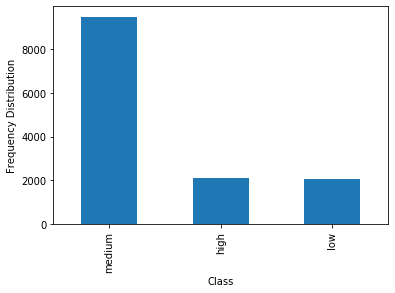

AxesSubplot(0.125,0.125;0.775x0.755)


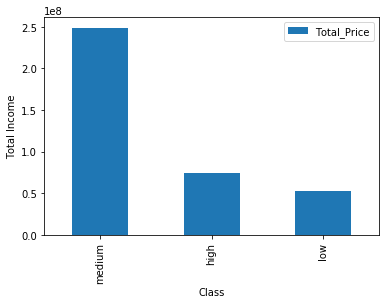

In [366]:

print(total_merged_dataset['product_class'].value_counts().plot(kind='bar'))
plt.xlabel("Class")
plt.ylabel("Frequency Distribution")
plt.show()


print(Income_by_product_class.plot(kind='bar'))
plt.xlabel("Class")
plt.ylabel("Total Income")
plt.show()

In [367]:
income_by_state = total_merged_dataset.groupby('state').agg({'Total_Price':'sum'}).sort_values('Total_Price',ascending=False)

AxesSubplot(0.125,0.125;0.775x0.755)


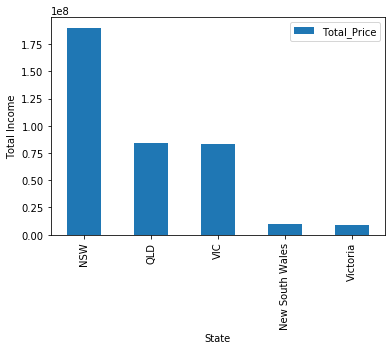

AxesSubplot(0.125,0.125;0.775x0.755)


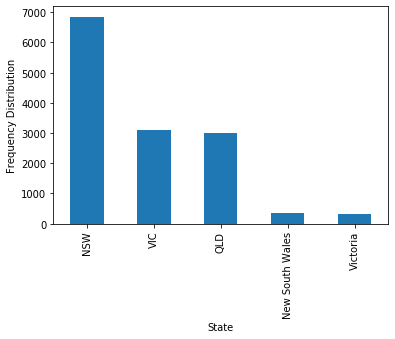

In [368]:
print(income_by_state.plot(kind='bar'))
plt.xlabel("State")
plt.ylabel("Total Income")
plt.show()

print(total_merged_dataset['state'].value_counts().plot(kind='bar'))
plt.xlabel("State")
plt.ylabel("Frequency Distribution")
plt.show()

In [369]:
income_by_wealth = total_merged_dataset.groupby('wealth_segment').agg({'Total_Price':'sum'}).sort_values('Total_Price',ascending=False)

AxesSubplot(0.125,0.125;0.775x0.755)


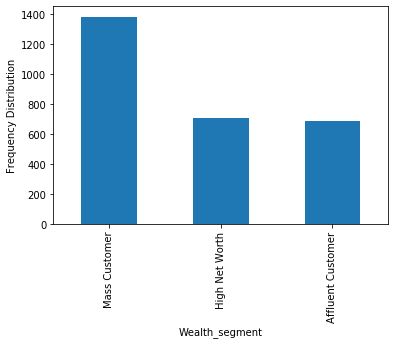

AxesSubplot(0.125,0.125;0.775x0.755)


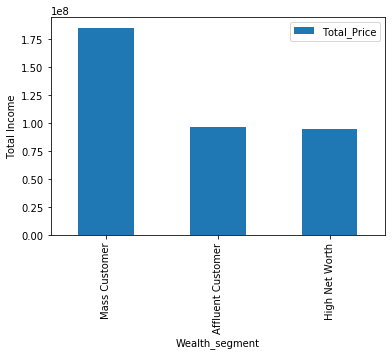

In [370]:
print(CustomerDemographic['wealth_segment'].value_counts().plot(kind='bar'))
plt.xlabel("Wealth_segment")
plt.ylabel("Frequency Distribution")
plt.show()


print(income_by_wealth.plot(kind='bar'))
plt.xlabel("Wealth_segment")
plt.ylabel("Total Income")
plt.show()

In [371]:
customer_prod_cat = total_merged_dataset.groupby(['customer_id','brand']).agg({'Total_Price':'sum'}).sort_values('Total_Price',ascending=False)

In [372]:
customer_prod_cat

Total_Price
customer_id brand                      
1060        Giant Bicycles    425626.96
420         Giant Bicycles    420291.18
2353        Giant Bicycles    416292.18
2751        Giant Bicycles    356352.12
630         Giant Bicycles    349366.50
...                                 ...
2712        Giant Bicycles         0.00
2411        OHM Cycles             0.00
            Solex                  0.00
            Trek Bicycles          0.00
310         OHM Cycles             0.00

[8868 rows x 1 columns]

In [373]:
customer_prod_cat = customer_prod_cat.reset_index()

In [374]:
customer_prod_cat_pivot = customer_prod_cat.pivot(index='customer_id',columns='brand',values='Total_Price')

In [375]:
customer_prod_cat_pivot.head()

brand,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B
customer_id,,,,,,
1,184061.88,82135.74,73699.71,81852.09,142422.06,NaN
2,77340.42,NaN,NaN,NaN,NaN,78407.19
9,57683.96,NaN,13262.81,200563.99,NaN,19919.92
12,33783.84,121085.44,NaN,4365.08,NaN,6308.08
13,NaN,55449.60,NaN,50268.30,11302.34,12079.44


In [376]:
total_merged_dataset['transaction_date'] = total_merged_dataset['transaction_date'].map(lambda x :DT.strptime(x, '%m/%d/%Y'))

In [377]:
recent_trans_total_spend=total_merged_dataset.groupby('customer_id').\
agg({'transaction_date':'max','Total_Price':'sum'}). \
rename(columns={'transaction_date':'RECENT TRANSACTION DATE','Total_Price':'TOTAL SPENT'})
recent_trans_total_spend.head()

,RECENT TRANSACTION DATE,TOTAL SPENT
customer_id,,
1,2017-12-23,564171.48
2,2017-08-24,155747.61
9,2017-10-13,291430.68
12,2017-10-24,165542.44
13,2017-12-03,129099.68


In [378]:
customer_KPIs=customer_prod_cat_pivot.merge(recent_trans_total_spend,how='inner',left_index=True, right_index=True )
customer_KPIs.head()

,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B,RECENT TRANSACTION DATE,TOTAL SPENT
customer_id,,,,,,,,
1,184061.88,82135.74,73699.71,81852.09,142422.06,NaN,2017-12-23,564171.48
2,77340.42,NaN,NaN,NaN,NaN,78407.19,2017-08-24,155747.61
9,57683.96,NaN,13262.81,200563.99,NaN,19919.92,2017-10-13,291430.68
12,33783.84,121085.44,NaN,4365.08,NaN,6308.08,2017-10-24,165542.44
13,NaN,55449.60,NaN,50268.30,11302.34,12079.44,2017-12-03,129099.68


In [379]:
customer_KPIs = customer_KPIs.fillna(0)
customer_KPIs.head()

,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B,RECENT TRANSACTION DATE,TOTAL SPENT
customer_id,,,,,,,,
1,184061.88,82135.74,73699.71,81852.09,142422.06,0.00,2017-12-23,564171.48
2,77340.42,0.00,0.00,0.00,0.00,78407.19,2017-08-24,155747.61
9,57683.96,0.00,13262.81,200563.99,0.00,19919.92,2017-10-13,291430.68
12,33783.84,121085.44,0.00,4365.08,0.00,6308.08,2017-10-24,165542.44
13,0.00,55449.60,0.00,50268.30,11302.34,12079.44,2017-12-03,129099.68


In [381]:
customer_all_view=total_merged_dataset.merge(customer_KPIs,how='inner', left_on='customer_id', right_index=True)

In [382]:
customer_all_view.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,country,property_valuation,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B,RECENT TRANSACTION DATE,TOTAL SPENT
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Australia,6.0,18141.58,0.0,0.0,6694.46,0.00,0.00,2017-10-16,24836.04
7538,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Australia,6.0,18141.58,0.0,0.0,6694.46,0.00,0.00,2017-10-16,24836.04
12910,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Australia,6.0,18141.58,0.0,0.0,6694.46,0.00,0.00,2017-10-16,24836.04
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Australia,5.0,107325.99,0.0,0.0,108091.39,34613.88,32329.25,2017-12-10,282360.51
4663,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Australia,5.0,107325.99,0.0,0.0,108091.39,34613.88,32329.25,2017-12-10,282360.51


In [383]:
customer_all_view.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'Age', 'Total_Price', 'address', 'postcode',
       'state', 'country', 'property_valuation', 'Giant Bicycles',
       'Norco Bicycles', 'OHM Cycles', 'Solex', 'Trek Bicycles', 'WeareA2B',
       'RECENT TRANSACTION DATE', 'TOTAL SPENT'],
      dtype='object')

In [396]:
table=pd.crosstab(customer_all_view['wealth_segment'],customer_all_view['online_order'])
table

online_order,0.0,1.0
wealth_segment,,
Affluent Customer,1683,1710
High Net Worth,1738,1730
Mass Customer,3404,3371


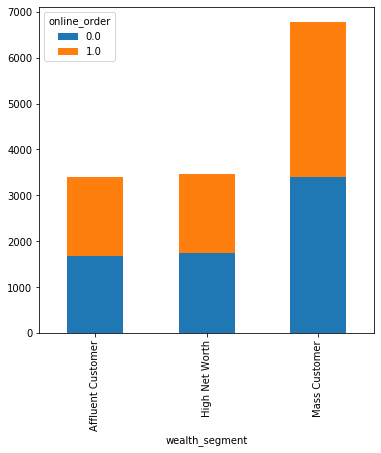

In [397]:
table.plot(kind='bar', stacked=True,figsize=(6,6))
plt.show()

In [398]:
table=pd.crosstab(customer_all_view['job_industry_category'],customer_all_view['online_order'])
table

online_order,0.0,1.0
job_industry_category,,
Argiculture,257,225
Entertainment,298,288
Financial Services,1600,1628
Health,1308,1345
IT,298,284
Manufacturing,1641,1681
Property,555,532
Retail,700,711
Telecommunications,168,117


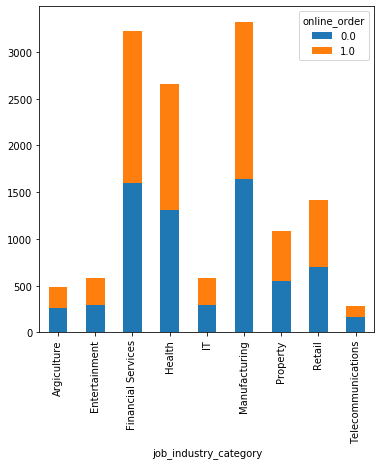

In [399]:
table.plot(kind='bar', stacked=True,figsize=(6,6))
plt.show()

In [400]:
table=pd.crosstab(customer_all_view['gender'],customer_all_view['online_order'])
table

online_order,0.0,1.0
gender,,
Female,3512,3450
Male,3308,3358
Uniform,5,3


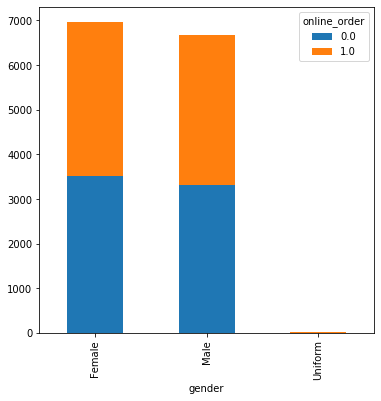

In [401]:
table.plot(kind='bar', stacked=True,figsize=(6,6))
plt.show()

In [394]:
customer_all_view['AGE_BINNED'] = pd.cut(customer_all_view['Age'],10) # 10 bins of age
customer_all_view['AGE_BINNED'].value_counts()

(33.8, 49.6]      6050
(49.6, 65.4]      3703
(17.842, 33.8]    3643
(65.4, 81.2]       217
(81.2, 97.0]        15
(160.2, 176.0]       8
(144.4, 160.2]       0
(128.6, 144.4]       0
(112.8, 128.6]       0
(97.0, 112.8]        0
Name: AGE_BINNED, dtype: int64

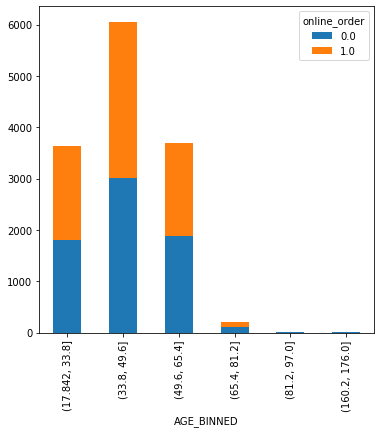

In [404]:
table=pd.crosstab(customer_all_view['AGE_BINNED'],customer_all_view['online_order'])
table.plot(kind='bar', stacked=True,figsize=(6,6))
plt.show()

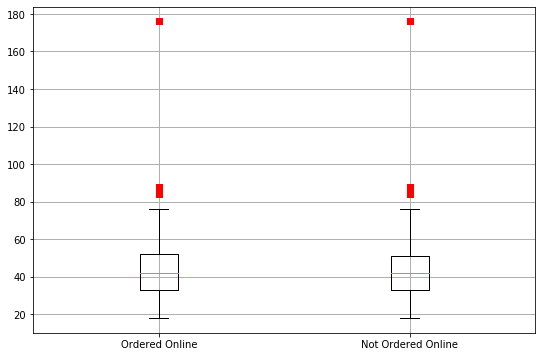

In [405]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
plot1=customer_all_view['Age'][customer_all_view['online_order'] == 0]
plot2=customer_all_view['Age'][customer_all_view['online_order'] == 1]
list1=[plot1,plot2]
ax.boxplot(list1,0,'rs',1)
ax.set_xticklabels(['Ordered Online', 'Not Ordered Online'])
plt.grid( linestyle='-', linewidth=1)
plt.show()

In [406]:
customer_all_view['TOTAL SPENT BINNED'] = pd.cut(customer_all_view['TOTAL SPENT'],10) # 10 bins of age

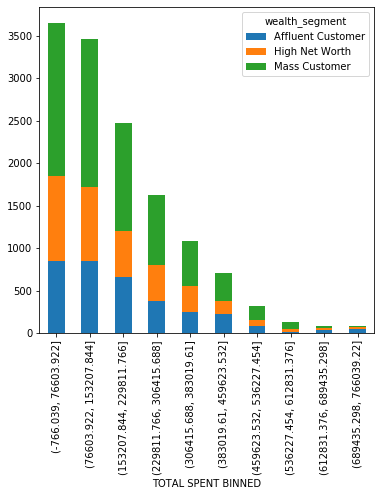

In [407]:
table=pd.crosstab(customer_all_view['TOTAL SPENT BINNED'],customer_all_view['wealth_segment'])
table.plot(kind='bar', stacked=True,figsize=(6,6))
plt.show()

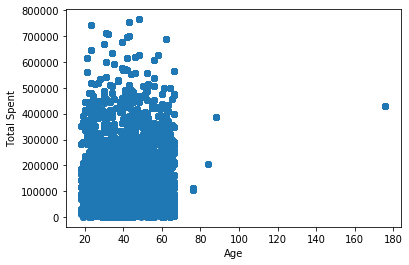

In [412]:
plt.scatter(customer_all_view['Age'],customer_all_view['TOTAL SPENT'])
plt.xlabel("Age")
plt.ylabel("Total Spent")
plt.show()

In [414]:
from scipy.stats import pearsonr
pearsonr(customer_all_view['Age'],customer_all_view['TOTAL SPENT'])

(-0.024693379765617546, 0.003930299906507014)

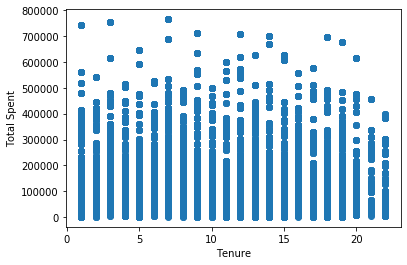

In [415]:
plt.scatter(customer_all_view['tenure'],customer_all_view['TOTAL SPENT'])
plt.xlabel("Tenure")
plt.ylabel("Total Spent")
plt.show()

In [416]:
pearsonr(customer_all_view['tenure'],customer_all_view['TOTAL SPENT'])

(-0.02444376655631562, 0.004309870018238328)

In [418]:
customer_all_view.to_csv('customer_all_view.csv')